# Installation instructions - Spark Standalone

### Common
1. Ensure that Python and Java are installed and added to the PATH environment variable so that they're accessible on the command line. (For Java, both OracleJDK and OpenJDK should work.)
2. Download and extract the Spark binaries (http://spark.apache.org/downloads.html).
3. Set the SPARK_HOME environment variable the point to their location.
4. Use PIP to install the findspark Python library (https://pypi.org/project/findspark/).

### Windows specific steps
1. Download version 2.3.x of the Spark binaries and not version 2.4.x. There are issues with version 2.4.x on windows: https://stackoverflow.com/questions/53252181/python-worker-failed-to-connect-back.
2. Download winutils from https://github.com/steveloughran/winutils
3. Set the HADOOP_HOME environment vairable to point to the directory containing bin\winutils.exe.

## Test the installation

In [1]:
# Locates the pyspark binaries using SPARK_HOME and adds them to sys.path
import findspark
findspark.init()

In [2]:
import pyspark

In [3]:
import random
from pyspark.sql import SparkSession

In [4]:
# Creates a Spark session
spark = SparkSession.builder.appName("Pi").getOrCreate()

In [5]:
def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1.0

In [6]:
num_samples = 10000000

count = spark.sparkContext.parallelize(range(num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

3.1416884


In [7]:
spark.stop()

### Aside: estimating Pi

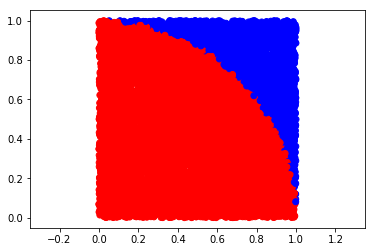

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

def colour(xy):
    x = xy[0]
    y = xy[1]
    if x*x + y*y < 1.0:
        return "red"
    return "blue"

n = 10000
x = list(map(lambda x: random.random(), range(n)))
y = list(map(lambda x: random.random(), range(n)))
c = list(map(colour, zip(x,y)))

plt.gca().axis('equal')
plt.scatter(x,y,c=c)